## Analyze P2L simulations from 27 March 

In [1]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

In [2]:
from datatree import open_datatree, DataTree 

In [3]:
import sys
sys.path.append('../modules/')

In [4]:
%reload_ext autoreload
%autoreload 2

from prepare_experiments import load_config
from sim_analysis_modules import create_leaf, analyze_sims

In [5]:
res = [10, 20, 40, 80]
C_ANN = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
C_GM = np.array([10, 50, 100, 500, 1000])/1000
model_types = ['ANN', 'GM1000']

In [6]:
exp_dir = '/scratch/db194/mom6/base_experiments_2025/Phillip2Layer/27Mar/'

In [7]:
model_type_dic = {}
for ANN_type in model_types: 
    
    res_dic = {}
    for r in res: 
        r = str(r)
        #exp_dic[ANN_type][r] = {}
        if ANN_type == 'ANN':
            C = C_ANN
        elif ANN_type == 'GM1000':
            C = C_GM

         
        coeff_dic = {}
        for coeff in C: 
            coeff = str(coeff)
            #exp_dic[ANN_type][r][coeff] = {}
            exp_name = 'res_' + str(r) + 'km_' + str(ANN_type) + '_' + str(coeff)
            print('Reading :' + exp_name)
            run_dic = {}
            
            run_dic['prog']     = xr.open_mfdataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/prog_*.nc', decode_times=False)
            run_dic['ave_prog'] = xr.open_mfdataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/ave_prog_*.nc', decode_times=False)
            run_dic['oce_geom'] = xr.open_dataset(exp_dir + 'runs/' + exp_name + '/OUTPUT/ocean_geometry.nc', decode_times=False)
            
            coeff_dic[coeff] = DataTree.from_dict(run_dic)
            
        res_dic[r] = DataTree.from_dict(coeff_dic)

    model_type_dic[ANN_type] = DataTree.from_dict(res_dic)

exp_tree = DataTree.from_dict(model_type_dic)    

Reading :res_10km_ANN_0.0


ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


Reading :res_10km_ANN_0.25
Reading :res_10km_ANN_0.5
Reading :res_10km_ANN_0.75
Reading :res_10km_ANN_1.0
Reading :res_20km_ANN_0.0
Reading :res_20km_ANN_0.25
Reading :res_20km_ANN_0.5
Reading :res_20km_ANN_0.75
Reading :res_20km_ANN_1.0
Reading :res_40km_ANN_0.0
Reading :res_40km_ANN_0.25
Reading :res_40km_ANN_0.5
Reading :res_40km_ANN_0.75
Reading :res_40km_ANN_1.0
Reading :res_80km_ANN_0.0
Reading :res_80km_ANN_0.25
Reading :res_80km_ANN_0.5
Reading :res_80km_ANN_0.75
Reading :res_80km_ANN_1.0
Reading :res_10km_GM1000_0.01
Reading :res_10km_GM1000_0.05
Reading :res_10km_GM1000_0.1
Reading :res_10km_GM1000_0.5
Reading :res_10km_GM1000_1.0
Reading :res_20km_GM1000_0.01
Reading :res_20km_GM1000_0.05
Reading :res_20km_GM1000_0.1
Reading :res_20km_GM1000_0.5
Reading :res_20km_GM1000_1.0
Reading :res_40km_GM1000_0.01
Reading :res_40km_GM1000_0.05
Reading :res_40km_GM1000_0.1
Reading :res_40km_GM1000_0.5
Reading :res_40km_GM1000_1.0
Reading :res_80km_GM1000_0.01
Reading :res_80km_GM1000_0.

In [8]:
exp_tree_test = exp_tree.copy()

In [22]:
test = exp_tree_test['GM1000']['20']['1.0']['ave_prog']

In [23]:
test

DataTree('ave_prog', parent="1.0")
    Dimensions:     (xq: 61, yh: 80, zl: 2, Time: 720, nv: 2, xh: 60, yq: 81, zi: 3)
    Coordinates:
      * xq          (xq) float64 0.0 20.0 40.0 60.0 ... 1.16e+03 1.18e+03 1.2e+03
      * yh          (yh) float64 10.0 30.0 50.0 70.0 ... 1.55e+03 1.57e+03 1.59e+03
      * zl          (zl) float64 1.031e+03 1.033e+03
      * Time        (Time) float64 2.5 7.5 12.5 ... 3.588e+03 3.592e+03 3.598e+03
      * nv          (nv) float64 1.0 2.0
      * xh          (xh) float64 10.0 30.0 50.0 70.0 ... 1.15e+03 1.17e+03 1.19e+03
      * yq          (yq) float64 0.0 20.0 40.0 60.0 ... 1.56e+03 1.58e+03 1.6e+03
      * zi          (zi) float64 1.03e+03 1.032e+03 1.034e+03
    Data variables: (12/14)
        u           (Time, zl, yh, xq) float64 dask.array<chunksize=(40, 2, 80, 61), meta=np.ndarray>
        v           (Time, zl, yq, xh) float64 dask.array<chunksize=(40, 2, 81, 60), meta=np.ndarray>
        h           (Time, zl, yh, xh) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        e           (Time, zi, yh, xh) float64 dask.array<chunksize=(40, 3, 80, 60), meta=np.ndarray>
        uh          (Time, zl, yh, xq) float64 dask.array<chunksize=(40, 2, 80, 61), meta=np.ndarray>
        vh          (Time, zl, yq, xh) float64 dask.array<chunksize=(40, 2, 81, 60), meta=np.ndarray>
        ...          ...
        uhTrANN     (Time, zl, yh, xq) float64 dask.array<chunksize=(40, 2, 80, 61), meta=np.ndarray>
        vhTrANN     (Time, zl, yq, xh) float64 dask.array<chunksize=(40, 2, 81, 60), meta=np.ndarray>
        average_T1  (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        average_T2  (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        average_DT  (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        Time_bnds   (Time, nv) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    Attributes:
        filename:   ave_prog_0002.nc
        title:      Phillips experiment
        grid_type:  regular
        grid_tile:  N/A

In [24]:
def add_transport_metrics(ds): 
    if 'Time_bnds' in ds: 
        ds = ds.copy()

        Tsel = slice(72, None) 

        m3_to_Sv = 1e-6

        ds['Vbar_resolved'] = ds.vh.isel(Time=Tsel).mean('Time').sum('xh') * m3_to_Sv
        ds['Vbar_param'] = ds.vhTrANN.isel(Time=Tsel).mean('Time').sum('xh') * m3_to_Sv
        ds['Vbar_total'] = ds['Vbar_resolved'] + ds['Vbar_param'] 
    else:
        pass
    return ds

In [25]:
def APE(interface):
    '''
    Returns APE in units of kinetic energy per unit mass, i.e.
    m^3/s^2
    '''
    #interface_rest = xr.DataArray([    0.,   -25.,   -75.,  -175.,  -300.,  -450.,  -625.,  -825.,
    #   -1050., -1300., -1600., -1950., -2350., -2850., -3400., -4000.], dims='zi')
    #g = xr.DataArray([1.0e+01, 2.1e-03, 3.9e-03, 5.4e-03, 5.8e-03, 5.8e-03, 5.7e-03,
    #   5.3e-03, 4.8e-03, 4.2e-03, 3.7e-03, 3.1e-03, 2.4e-03, 1.7e-03,
    #   1.1e-03, 0.0e+00], dims='zi')
    interface_rest = xr.DataArray([0. , -1000., -2000.], dims='zi')
    g = xr.DataArray([9.8, 1.96e-02, 9.8e+01], dims='zi')
    
    coordinate_of_bottom = interface.isel(zi=-1).drop_vars(['zi'])
    
    hint = interface - interface_rest
    
    # Where bottom is upper than the rest interface
    hbot = np.maximum(coordinate_of_bottom - interface_rest,0)
    
    APE_instant = (0.5 * g * (hint**2))
    APE_constant = (0.5 * g * (hbot**2))
    
    return (APE_instant - APE_constant).sum('zi')

In [29]:
def add_energy_metrics(ds): 

    if 'RV' in ds: 
        ds = ds.copy()

        ds = ds.isel(xq=slice(1,None), yq=slice(1,None))
        
        grid = Grid(ds, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'inner': 'zl', 'outer': 'zi'} }, periodic=None)

        dx = ds.xh.diff('xh').values[0] * 1e3
        dA = dx*dx
        
        ds['KE'] = (0.5 * ( grid.interp(ds.u, 'X', boundary='fill')**2 +  
                      grid.interp(ds.v, 'Y', boundary='fill')**2 ) * 
                      ds.h * dA * ds.zl).sum('zl').sum(['xh','yh'])
        
        ds_mean = ds.isel(Time=slice(72, None)).mean('Time')
        
        ds['MKE'] = (0.5 * ( grid.interp(ds_mean.u, 'X', boundary='fill')**2 +  
                         grid.interp(ds_mean.v, 'Y', boundary='fill')**2 ) 
                      * ds_mean.h * dA * ds.zl).sum('zl').sum(['xh','yh'])

        ds['EKE'] = ds['KE'] - ds['MKE']

        ds['APE'] = (APE(ds.e)* 1031.*dA).sum(['xh', 'yh'])
        ds['MAPE'] = (APE(ds_mean.e)* 1031.*dA).sum(['xh', 'yh'])
        
        ds['EAPE'] = ds['APE'] - ds['MAPE']
        
        
    else:
        pass

    return ds

In [27]:
exp_tree_test = exp_tree_test.map_over_subtree(add_transport_metrics)

In [30]:
exp_tree_test = exp_tree_test.map_over_subtree(add_energy_metrics)

In [35]:
def add_PE_reduction_rate(ds): 
    if 'RV' in ds: 
        ds = ds.copy()

        ds['APE_reduce_rate'] = (ds.Fx * ds.dhdx + ds.Fy * ds.dhdy).isel(zl=1).isel(Time=slice(72, None)).mean('Time')
    else: 
        pass
    return ds

In [76]:
exp_tree_test = exp_tree_test.map_over_subtree(add_PE_reduction_rate)

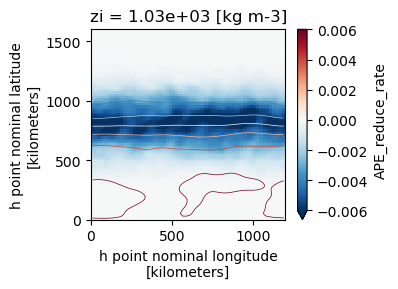

In [87]:

plt.figure(figsize=(4,3))
exp_tree_test['ANN']['20']['0.0']['prog'].APE_reduce_rate.plot(vmin = -6e-3)

exp_tree_test['ANN']['20']['0.0']['ave_prog'].e.isel(Time=slice(72, None), zi=0).mean('Time').plot.contour(levels=np.linspace(-0.6, 0.6, 7), linewidths=0.5)
plt.tight_layout()
plt.savefig('sim_100km_P2L0.png')

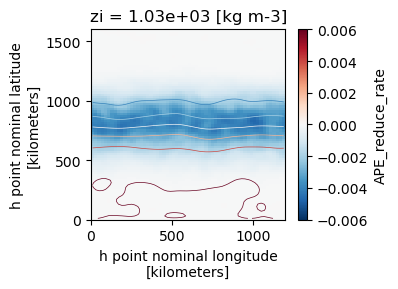

In [88]:

plt.figure(figsize=(4,3))
exp_tree_test['ANN']['20']['1.0']['prog'].APE_reduce_rate.plot(vmin = -6e-3)

exp_tree_test['ANN']['20']['1.0']['ave_prog'].e.isel(Time=slice(72, None), zi=0).mean('Time').plot.contour(levels=np.linspace(-0.6, 0.6, 7), linewidths=0.5)
plt.tight_layout()
plt.savefig('sim_100km.png')

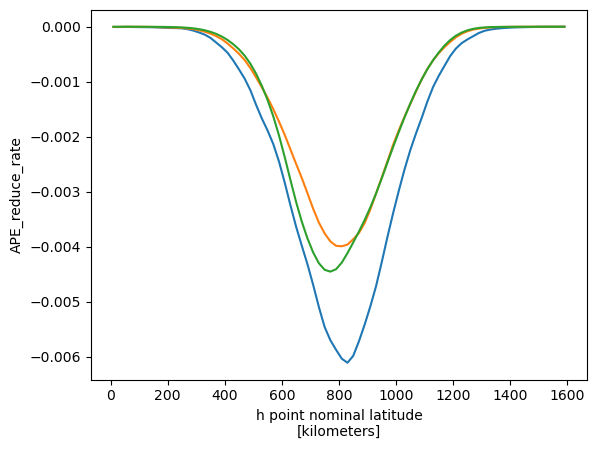

In [77]:
exp_tree_test['ANN']['20']['0.0']['prog'].APE_reduce_rate.mean('xh').plot()
exp_tree_test['ANN']['20']['1.0']['prog'].APE_reduce_rate.mean('xh').plot()
exp_tree_test['GM1000']['20']['1.0']['prog'].APE_reduce_rate.mean('xh').plot()

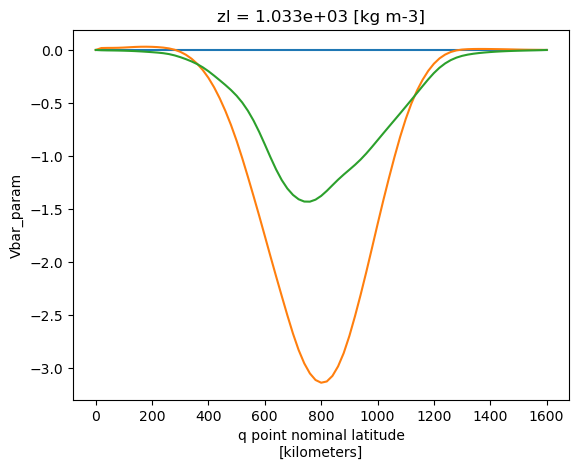

In [79]:
exp_tree_test['ANN']['20']['0.0']['ave_prog'].Vbar_param.isel(zl=1).plot()
exp_tree_test['ANN']['20']['1.0']['ave_prog'].Vbar_param.isel(zl=1).plot()
exp_tree_test['GM1000']['20']['1.0']['ave_prog'].Vbar_param.isel(zl=1).plot()

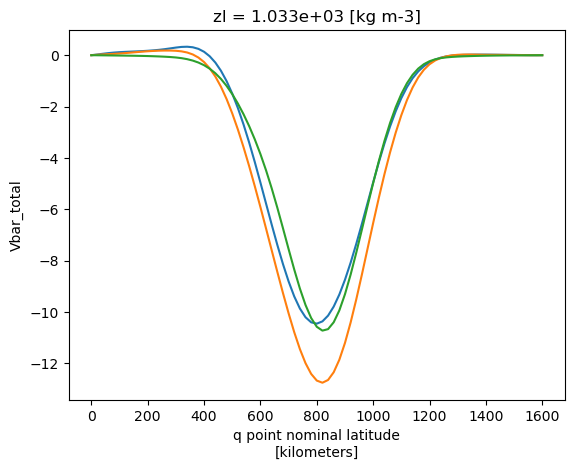

In [80]:
exp_tree_test['ANN']['20']['0.0']['ave_prog'].Vbar_total.isel(zl=1).plot()
exp_tree_test['ANN']['20']['1.0']['ave_prog'].Vbar_total.isel(zl=1).plot()
exp_tree_test['GM1000']['20']['1.0']['ave_prog'].Vbar_total.isel(zl=1).plot()

In [41]:
test1 = exp_tree_test['ANN']['20']['0.0']['prog']
test2 = exp_tree_test['ANN']['20']['1.0']['prog']

In [66]:
test3 = exp_tree_test['GM1000']['20']['1.0']['prog']

In [42]:
test1 = add_PE_reduction_rate(test1)
test2 = add_PE_reduction_rate(test2)

In [67]:
test3 = add_PE_reduction_rate(test3)

In [60]:
test1_emean = test1.e.isel(Time=slice(72, None), zi=0).mean('Time')

In [61]:
test2_emean = test2.e.isel(Time=slice(72, None), zi=0).mean('Time')

In [68]:
test3_emean = test3.e.isel(Time=slice(72, None), zi=0).mean('Time')

In [75]:
test1

DataTree('prog', parent=None)
    Dimensions:          (xq: 60, yh: 80, zl: 2, Time: 720, xh: 60, yq: 80, zi: 3)
    Coordinates:
      * xq               (xq) float64 20.0 40.0 60.0 ... 1.16e+03 1.18e+03 1.2e+03
      * yh               (yh) float64 10.0 30.0 50.0 ... 1.55e+03 1.57e+03 1.59e+03
      * zl               (zl) float64 1.031e+03 1.033e+03
      * Time             (Time) float64 5.0 10.0 15.0 ... 3.59e+03 3.595e+03 3.6e+03
      * xh               (xh) float64 10.0 30.0 50.0 ... 1.15e+03 1.17e+03 1.19e+03
      * yq               (yq) float64 20.0 40.0 60.0 ... 1.56e+03 1.58e+03 1.6e+03
      * zi               (zi) float64 1.03e+03 1.032e+03 1.034e+03
    Data variables: (12/27)
        u                (Time, zl, yh, xq) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        v                (Time, zl, yq, xh) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        h                (Time, zl, yh, xh) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        e                (Time, zi, yh, xh) float64 dask.array<chunksize=(40, 3, 80, 60), meta=np.ndarray>
        RV               (Time, zl, yq, xq) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        PV               (Time, zl, yq, xq) float64 dask.array<chunksize=(40, 2, 80, 60), meta=np.ndarray>
        ...               ...
        MKE              float64 dask.array<chunksize=(), meta=np.ndarray>
        EKE              (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        APE              (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        MAPE             float64 dask.array<chunksize=(), meta=np.ndarray>
        EAPE             (Time) float64 dask.array<chunksize=(40,), meta=np.ndarray>
        APE_reduce_rate  (yh, xh) float64 dask.array<chunksize=(80, 60), meta=np.ndarray>
    Attributes:
        filename:   prog_0005.nc
        title:      Phillips experiment
        grid_type:  regular
        grid_tile:  N/A

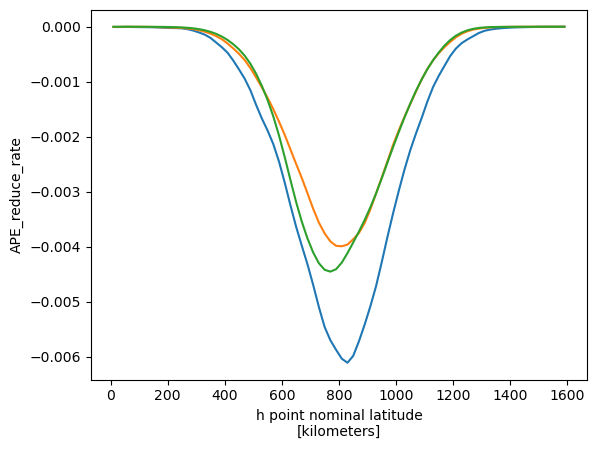

In [74]:
test1.APE_reduce_rate.mean('xh').plot()
test2.APE_reduce_rate.mean('xh').plot()
test3.APE_reduce_rate.mean('xh').plot()

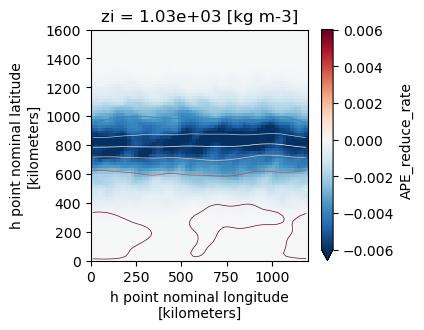

In [63]:

plt.figure(figsize=(3.5,3))
test1.APE_reduce_rate.plot(vmin = -6e-3)
test1_emean.plot.contour(levels=np.linspace(-0.6, 0.6, 7), linewidths=0.5)

#plt.savefig('filt_100km.png')

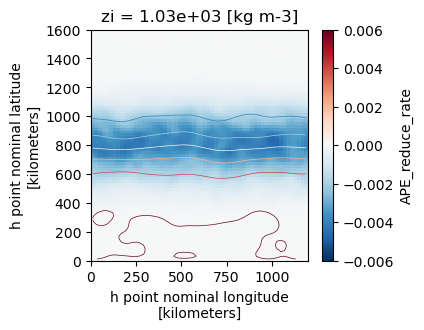

In [65]:

plt.figure(figsize=(3.5,3))
test2.APE_reduce_rate.plot(vmin = -6e-3)
test2_emean.plot.contour(levels=np.linspace(-0.6, 0.6, 7), linewidths=0.5)
#plt.savefig('filt_100km.png')

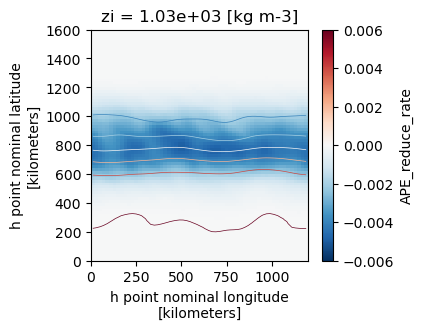

In [71]:

plt.figure(figsize=(3.5,3))
test3.APE_reduce_rate.plot(vmin = -6e-3, vmax = 6e-3, cmap='RdBu_r')
test3_emean.plot.contour(levels=np.linspace(-0.6, 0.6, 7), linewidths=0.5)

#plt.savefig('filt_100km.png')

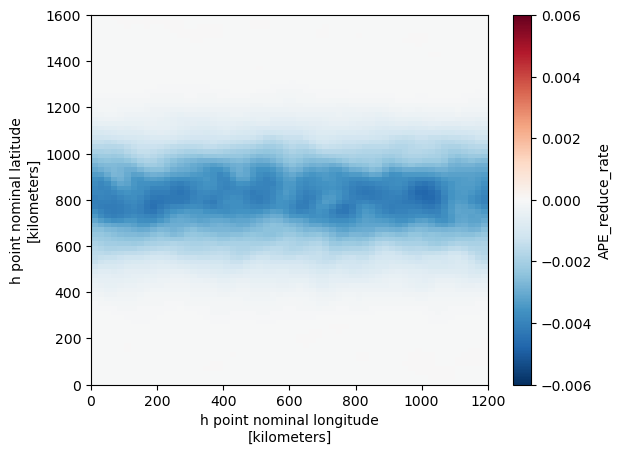

In [46]:
test2.APE_reduce_rate.plot(vmin = -6e-3)

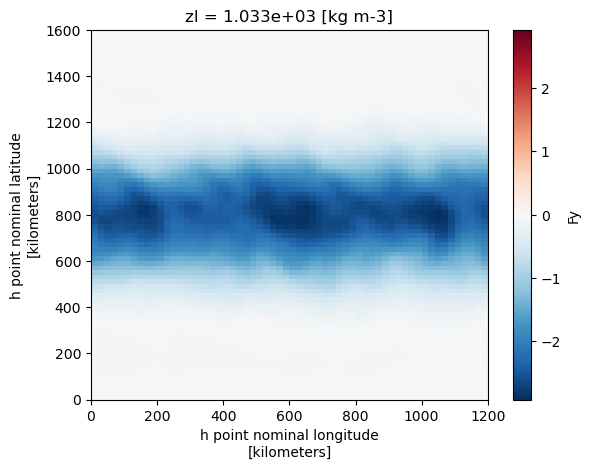

In [34]:
exp_tree_test['ANN']['20']['1.0']['prog'].Fy.isel(Time=slice(72, None), zl=1).mean('Time').plot()

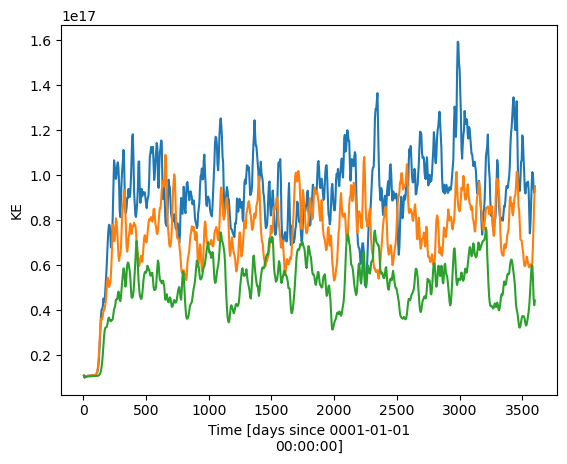

In [31]:
exp_tree_test['ANN']['20']['0.0']['prog'].KE.plot()
exp_tree_test['ANN']['20']['1.0']['prog'].KE.plot()
exp_tree_test['GM1000']['20']['1.0']['prog'].KE.plot()

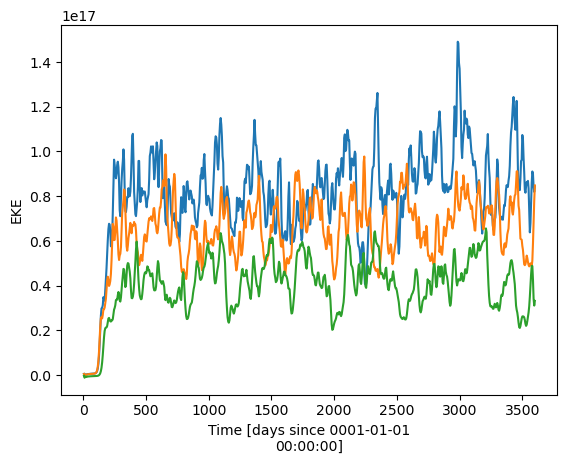

In [114]:
exp_tree_test['ANN']['20']['0.0']['prog'].EKE.plot()
exp_tree_test['ANN']['20']['1.0']['prog'].EKE.plot()
exp_tree_test['GM1000']['20']['1.0']['prog'].EKE.plot()

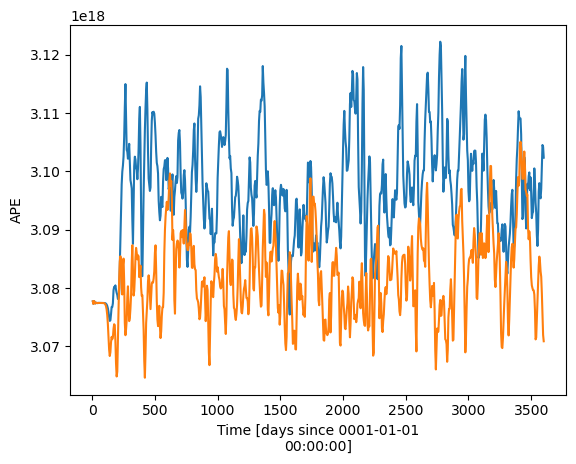

In [115]:
exp_tree_test['ANN']['20']['0.0']['prog'].APE.plot()
exp_tree_test['ANN']['20']['1.0']['prog'].APE.plot()

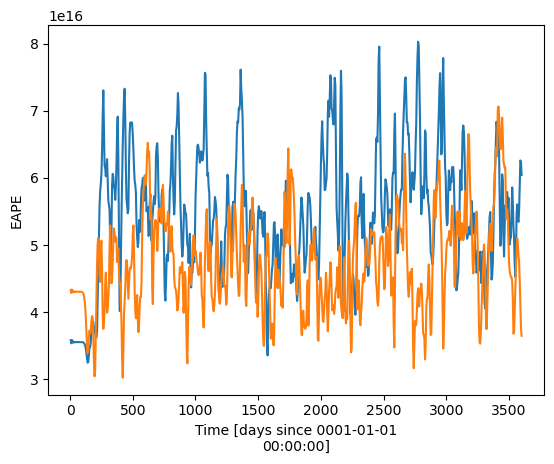

In [116]:
exp_tree_test['ANN']['20']['0.0']['prog'].EAPE.plot()
exp_tree_test['ANN']['20']['1.0']['prog'].EAPE.plot()

In [ ]:
MKE = np.zeros((len(res), len(C_ANN), len(model_types)),)
EKE = np.zeros_like(MKE)

MAPE = np.zeros_like(MKE)
EAPE = np.zeros_like(MKE)

for k, ANN_type in enumerate(model_types): 
    for i, r in enumerate(res):
        if ANN_type == 'ANN':
            C = C_ANN
        elif ANN_type == 'GM1000':
            C = C_GM

        for j, coeff in enumerate(C): 
            MKE[i,j,k] = exp_tree_test[ANN_type][str(r)][str(coeff)]['prog'].MKE.values
            EKE[i,j,k] = exp_tree_test[ANN_type][str(r)][str(coeff)]['prog'].EKE.isel(Time=slice(72, None)).mean('Time').values

            MAPE[i,j,k] = exp_tree_test[ANN_type][str(r)][str(coeff)]['prog'].MAPE.values
            EAPE[i,j,k] = exp_tree_test[ANN_type][str(r)][str(coeff)]['prog'].EAPE.isel(Time=slice(72, None)).mean('Time').values



In [ ]:
exp_tree_test['ANN']['20']['0.0']['prog'].KE.plot()

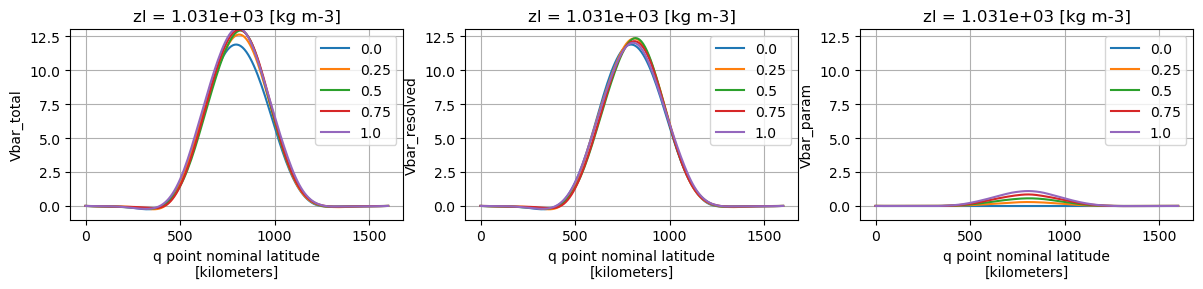

In [71]:
plt.figure(figsize=(12, 3))

Lscale = '10'

plt.subplot(131)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

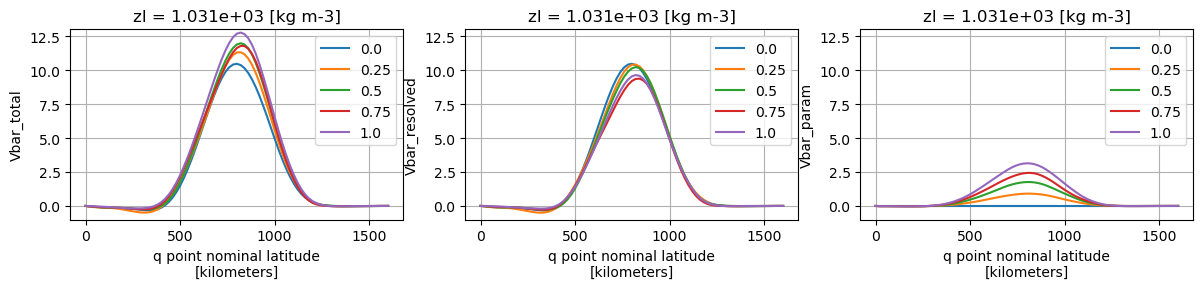

In [67]:
plt.figure(figsize=(12, 3))

Lscale = '20'

plt.subplot(131)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

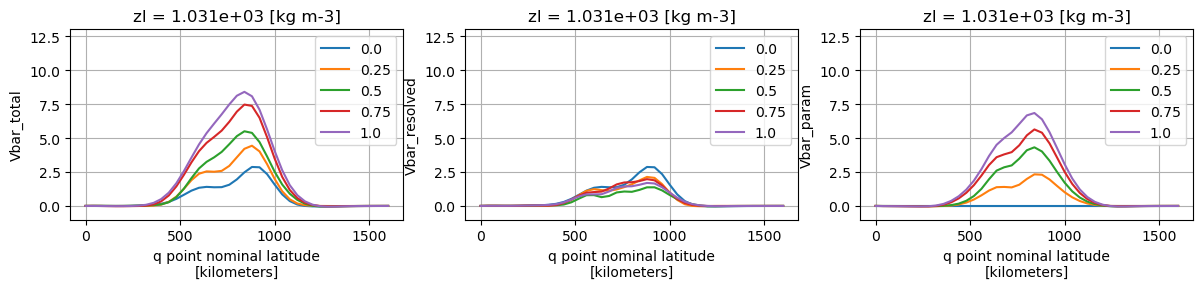

In [69]:
plt.figure(figsize=(12, 3))

Lscale = '40'

plt.subplot(131)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

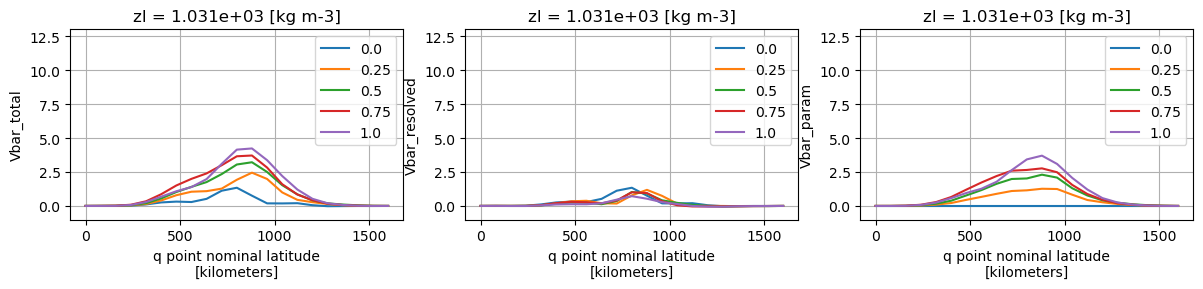

In [70]:
plt.figure(figsize=(12, 3))

Lscale = '80'

plt.subplot(131)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_ANN:
    exp_tree_test['ANN'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

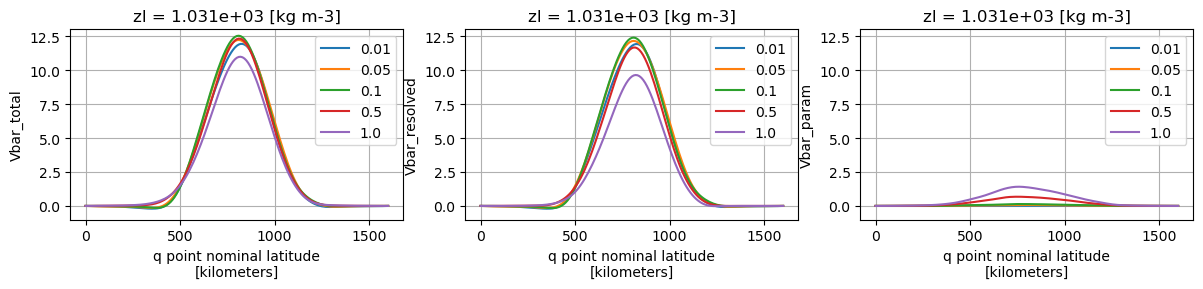

In [72]:
plt.figure(figsize=(12, 3))

Lscale = '10'

plt.subplot(131)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

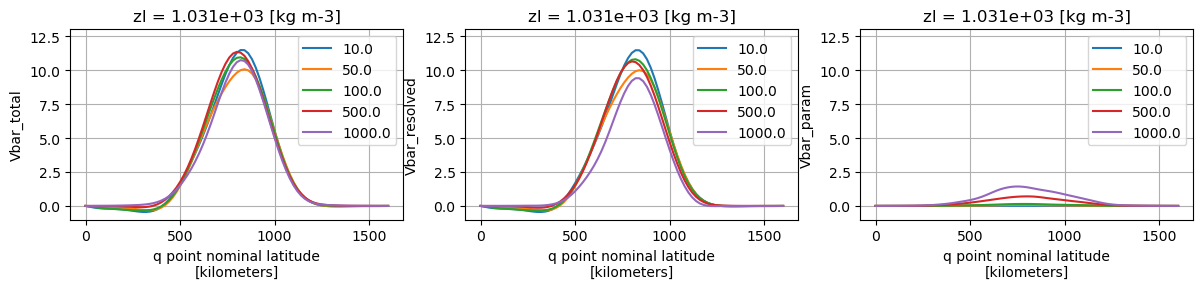

In [73]:
plt.figure(figsize=(12, 3))

Lscale = '20'

plt.subplot(131)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

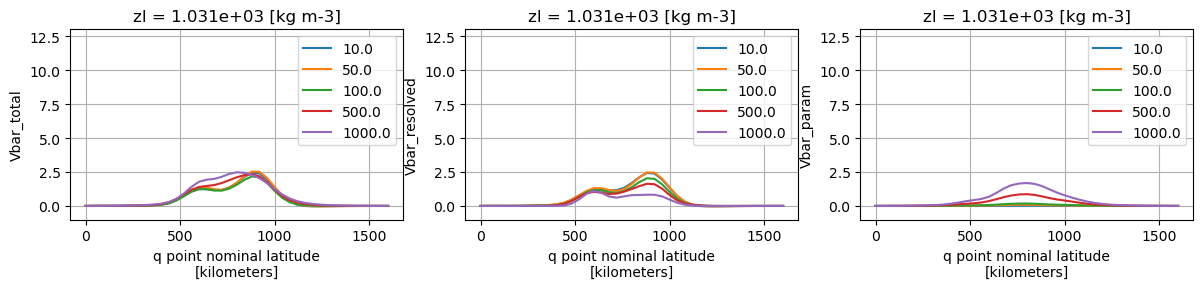

In [74]:
plt.figure(figsize=(12, 3))

Lscale = '40'

plt.subplot(131)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

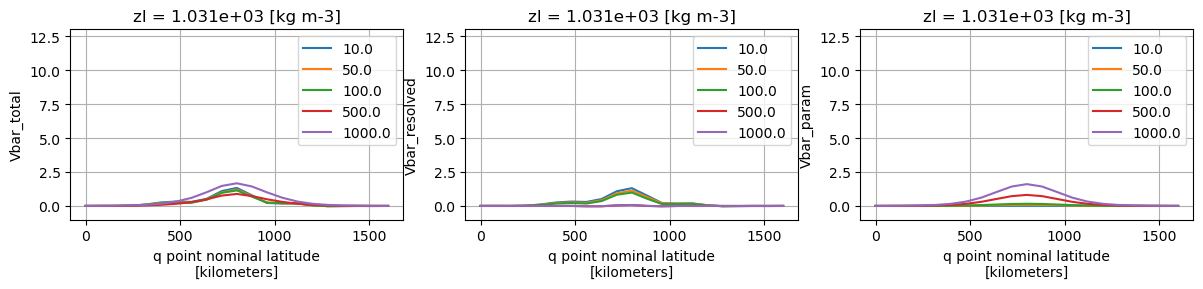

In [75]:
plt.figure(figsize=(12, 3))

Lscale = '80'

plt.subplot(131)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_total.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(132)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_resolved.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.subplot(133)
for c in C_GM:
    exp_tree_test['GM1000'][Lscale][str(c)]['ave_prog'].Vbar_param.isel(zl=0).plot(label = c*1000)
    plt.legend()
plt.ylim([-1, 13])
plt.grid()

plt.tight_layout()

## OLD


In [3]:
scales = ['10','20','30','40','80']
#C = ['0.1','0.25','0.5','1']
Cvals = ['0','0.1','0.25','0.3','0.4','0.5','0.6','0.7','0.75','1']

scales_array = np.array(scales, dtype=float)
Cvals_array = np.array(Cvals, dtype=float)

In [4]:
ds_no_param_dic = {}
create_leaf(ds_no_param_dic, ['04'],analyze_sims('/scratch/db194/mom6/tests_Phillips_2layer/generate_training_data/Phillips_2layer_4km_10day/'))

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [5]:
ds_ANN_dic = {}

dir = '/scratch/db194/mom6/tests_Phillips_2layer/tests_actual_ANN/tests_local_para_perp_arch_11mar_2024/Phillips_2layer_'
for L in scales:
    print(L)
    for c in Cvals:
        if c == '0': 
            dir_case= '/scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_'+L+'km/'
        elif c == '1': 
            dir_case = dir + L+'km_ANN_FGR5/'
        elif c == '0.25' or c == '0.75':
            intp = str(int(float(c)*100))
            dir_case = dir + L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
        else: 
            intp = str(int(float(c)*10))
            dir_case = dir + L+'km_ANN_FGR5_Cperp_p'+intp+'_Cpara_p'+intp+'/'
            
        #print(c)
        #print(dir_case)
        
        create_leaf(ds_ANN_dic, [L, c], analyze_sims(dir_case))
            
   
   

10
20
30
40
80


### Overturning

In [6]:
OT_max = np.zeros((len(scales_array), len(Cvals)) )
OT_resolved = np.zeros((len(scales_array), len(Cvals)) )
OT_param = np.zeros((len(scales_array), len(Cvals)) )

for i, L in enumerate(scales): 
    for j, c in enumerate(Cvals):
        
        ds = ds_ANN_dic[L][c] 
    
        OT = ds.Vbar_total.sel(Time=slice(360, None)).mean('Time')
        OT_max[i,j] = OT.max().values

        OT_resolved[i,j] = ds.Vbar_resolved.sel(Time=slice(360, None)).mean('Time').max().values
        OT_param[i,j] = ds.Vbar_param.sel(Time=slice(360, None)).mean('Time').max().values
        #OT.plot(label=L+'km')

#plt.legend()
#plt.ylabel('Overturning [Sv]')
#plt.xlabel('y [km]')

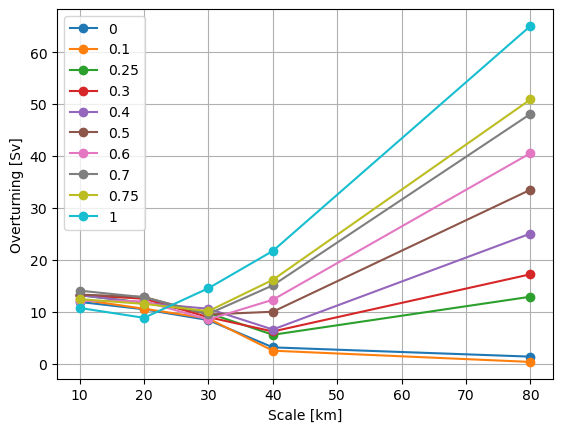

In [7]:
for j,c in enumerate(Cvals):
    plt.plot(scales_array, OT_max[:,j], marker='o', label=c)
plt.xlabel('Scale [km]')
plt.ylabel('Overturning [Sv]')
plt.grid()
plt.legend()


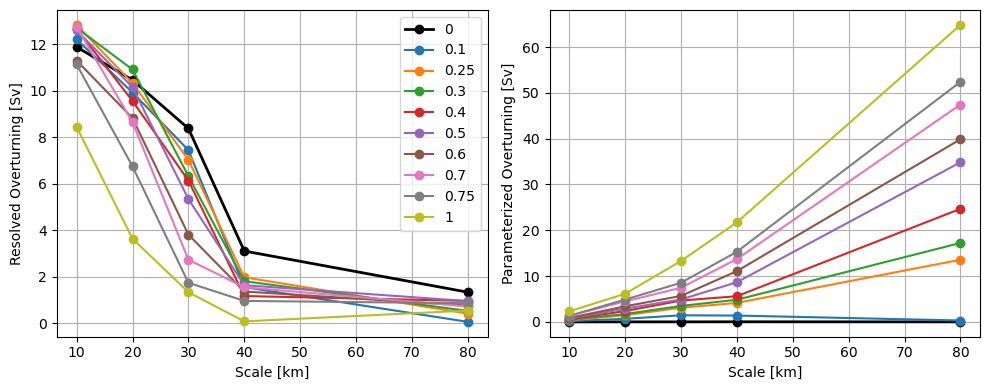

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(121)
for j,c in enumerate(Cvals):
    if c == '0':
        
        plt.plot(scales_array, OT_resolved[:,j], marker='o', label=c, color='k', linewidth=2)
    else:
        plt.plot(scales_array, OT_resolved[:,j], marker='o', label=c)
plt.xlabel('Scale [km]')
plt.ylabel('Resolved Overturning [Sv]')
plt.grid()
plt.legend()

plt.subplot(122)
for j,c in enumerate(Cvals):
    if c =='0':
        plt.plot(scales_array, OT_param[:,j], marker='o', label=c, color='k', linewidth=2)
    else:
        plt.plot(scales_array, OT_param[:,j], marker='o', label=c)
plt.xlabel('Scale [km]')
plt.ylabel('Parameterized Overturning [Sv]')
plt.grid()
#plt.legend()

plt.tight_layout()


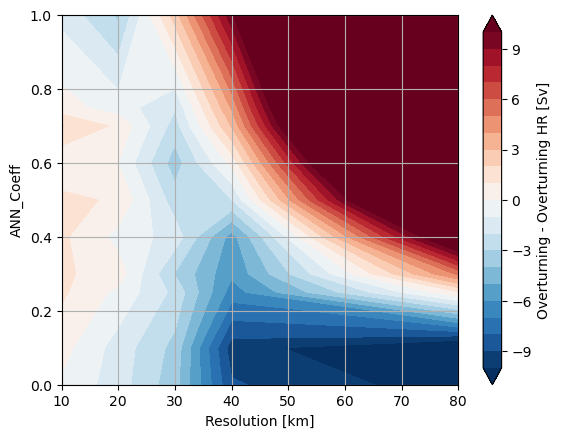

In [10]:
plt.contourf(scales_array, Cvals_array, OT_max.T-12, levels=np.linspace(-10,10,21), vmin=-10, vmax=10, cmap='RdBu_r', extend='both')
plt.colorbar(label='Overturning - Overturning HR [Sv]')
plt.xlabel('Resolution [km]')
plt.ylabel('ANN_Coeff')
plt.grid()

Text(0.5, 0, 'y [km]')

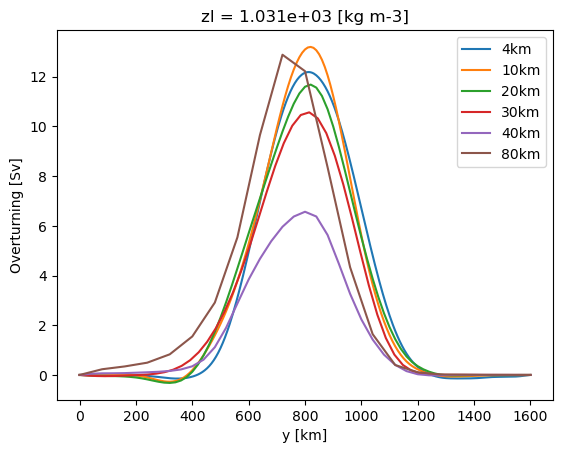

In [13]:

OT = ds_no_param_dic['04'].Vbar_total.sel(Time=slice(360, None)).mean('Time')
OT.plot(label='4km')

#c_choice = ['0.5', '0.5', '0.5', '0.5','0.25']
c_choice = ['0.4', '0.4', '0.4', '0.4','0.25']
#['0.1','0.25','0.5','0.75','1']
for i, L in enumerate(scales): 
    #for j, c in enumerate(Cvals):
        c = c_choice[i]   
        ds = ds_ANN_dic[L][c] 
    
        OT = ds.Vbar_total.sel(Time=slice(360, None)).mean('Time')
        #OT_max[i,j] = OT.max().values
        OT.plot(label=L+'km')

plt.legend()
plt.ylabel('Overturning [Sv]')
plt.xlabel('y [km]')

Text(0.5, 0, 'y [km]')

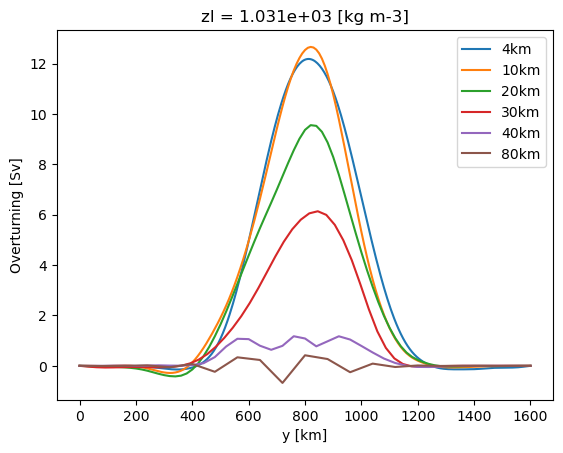

In [15]:

OT = ds_no_param_dic['04'].Vbar_resolved.sel(Time=slice(360, None)).mean('Time')
OT.plot(label='4km')

#c_choice = ['1', '0.75', '0.75', '0.5','0.25']
#['0.1','0.25','0.5','0.75','1']
for i, L in enumerate(scales): 
    #for j, c in enumerate(Cvals):
        c = c_choice[i]   
        ds = ds_ANN_dic[L][c] 
    
        OT = ds.Vbar_resolved.sel(Time=slice(360, None)).mean('Time')
        #OT_max[i,j] = OT.max().values
        OT.plot(label=L+'km')

plt.legend()
plt.ylabel('Overturning [Sv]')
plt.xlabel('y [km]')

Text(0.5, 0, 'y [km]')

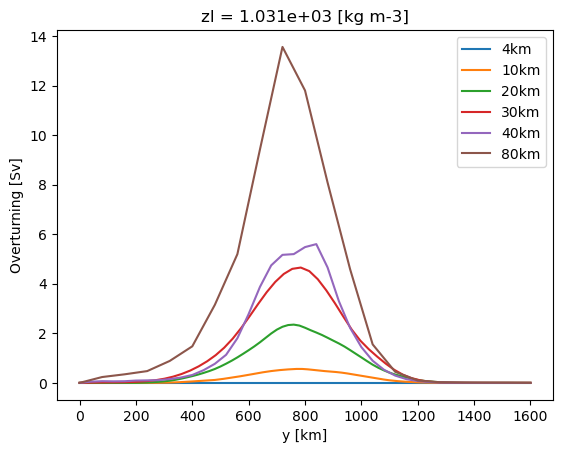

In [16]:

OT = ds_no_param_dic['04'].Vbar_param.sel(Time=slice(360, None)).mean('Time')
OT.plot(label='4km')

#c_choice = ['1', '0.75', '0.75', '0.5','0.25']
#['0.1','0.25','0.5','0.75','1']
for i, L in enumerate(scales): 
    #for j, c in enumerate(Cvals):
        c = c_choice[i]   
        ds = ds_ANN_dic[L][c] 
    
        OT = ds.Vbar_param.sel(Time=slice(360, None)).mean('Time')
        #OT_max[i,j] = OT.max().values
        OT.plot(label=L+'km')

plt.legend()
plt.ylabel('Overturning [Sv]')
plt.xlabel('y [km]')

## Mean state

In [85]:
common_y = np.linspace(100, 1500, 101) 
hmean_HR = ds_no_param_dic['04'].prog.e.isel(zi=1).mean('xh').sel(Time=slice(360, None)).mean('Time')
hmean_HR_int = hmean_HR.interp(yh=common_y)

Text(0.5, 0, 'y [km]')

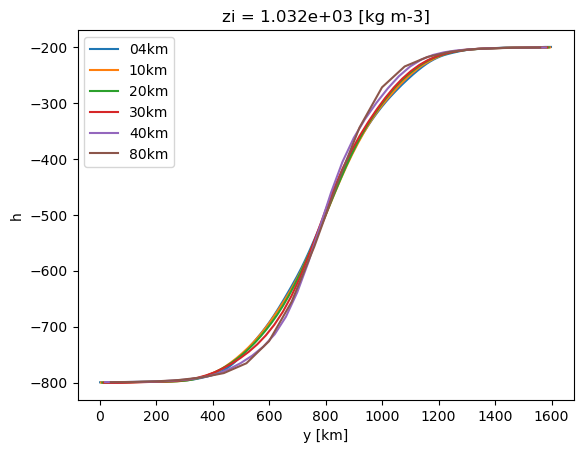

In [86]:
hmean_err = np.zeros_like(scales_array)

for i, L in enumerate(scales): 
    ds = ds_no_param_dic[L] 

    hmean = ds.prog.e.isel(zi=1).mean('xh').sel(Time=slice(360, None)).mean('Time')
    hmean_int = hmean.interp(yh=common_y)
    hmean_err[i] = (((hmean_int - hmean_HR_int)**2).mean('yh'))**0.5
    hmean.plot(label=L+'km')

plt.legend()
plt.ylabel('h')
plt.xlabel('y [km]')

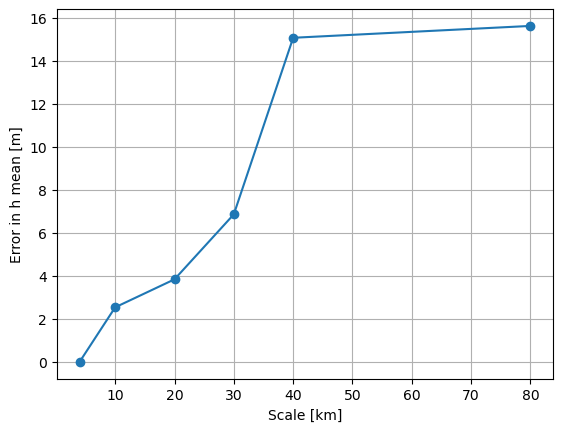

In [87]:
plt.plot(scales_array, hmean_err, marker='o')
plt.xlabel('Scale [km]')
plt.ylabel('Error in h mean [m]')
plt.grid()

## KE and PE

In [98]:
from xgcm import Grid

def KE_HR(ds):
    xgrid = Grid(ds, coords={'X': {'center': 'xh', 'outer': 'xq'},
                             'Y': {'center': 'yh', 'outer': 'yq'},
                             'Z': {'center': 'zl', 'outer': 'zi'} },
                 periodic=['X'])
    
    Umean = ds.u.mean(['Time','xq'])
    Vmean = ds.v.mean(['Time','xh'])
    
    Up = ds.u - Umean
    Vp = ds.v - Vmean
    
    MKE = 0.5*( Umean**2 + xgrid.interp(Vmean,'Y', boundary='extend')**2)
    EKE = 0.5*( xgrid.interp(Up, 'X')**2 + xgrid.interp(Vp,'Y', boundary='extend')**2).mean(['Time','xh'])

    return MKE.mean(['yh','zl']).values, EKE.mean(['yh','zl']).values

def PE_HR(ds): 

    gr = np.zeros(3)
    gr[0] = 9.81
    gr[1] = gr[0] * (ds.zl[1] - ds.zl[0])/ds.zl[0]
    gr[2] = 0.

    ds['gr'] = xr.DataArray(gr, dims={'zi'})

    eGlobMean = ds.e.mean(['Time','xh','yh'])
    eMean = ds.e.mean(['Time','xh']) - eGlobMean

    PE = (0.5* ds.gr * (ds.e - eGlobMean)**2).sum('zi').mean(['Time','xh','yh'])
    MPE = (0.5* ds.gr * eMean**2).sum('zi').mean(['yh'])
    EPE = PE - MPE

    return MPE, EPE

In [100]:
ds_no_param_dic

{'04': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/generate_training_data/Phillips_2layer_4km_10day/,
 '10': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_10km/,
 '20': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_20km/,
 '30': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_30km/,
 '40': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_40km/,
 '80': Data for sim at: /scratch/db194/mom6/tests_Phillips_2layer/Phillips_2layer_80km/}

In [102]:
MKE = np.zeros_like(scales_array)
EKE = np.zeros_like(scales_array)

MPE = np.zeros_like(scales_array)
EPE = np.zeros_like(scales_array)

for i, L in enumerate(scales): 
    print(L)
    ds = ds_no_param_dic[L].prog

    
    MKE[i], EKE[i] = KE_HR(ds.sel(Time=slice(360, None)))
    
    MPE[i], EPE[i] = PE_HR(ds.sel(Time=slice(360, None)))

04
10
20
30
40
80


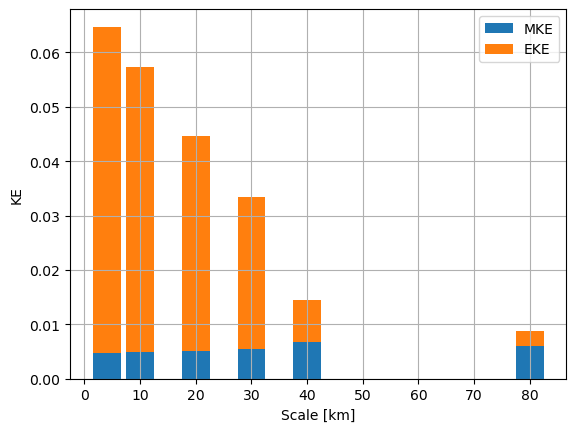

In [97]:
KE = {"MKE":MKE, 
      "EKE":EKE }

width=5
fig, ax = plt.subplots()
bottom = np.zeros(len(scales_array))

for boolean, weight_count in KE.items():
    p = ax.bar(scales_array, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_xlabel('Scale [km]')
ax.set_ylabel('KE')
ax.legend(loc='best')
plt.grid()

(500.0, 700.0)

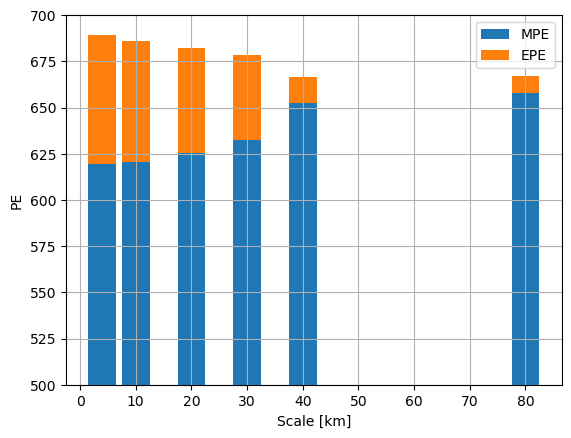

In [105]:
PE = {"MPE":MPE, 
      "EPE":EPE }

width=5
fig, ax = plt.subplots()
bottom = np.zeros(len(scales_array))

for boolean, weight_count in PE.items():
    p = ax.bar(scales_array, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_xlabel('Scale [km]')
ax.set_ylabel('PE')
ax.legend(loc='best')
plt.grid()
plt.ylim(500, 700)